## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
# Preview dataframe 
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
clean_application_df = application_df.drop(['EIN','NAME'], axis = 1)
# Preview dataframe 
clean_application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
clean_application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = clean_application_df['APPLICATION_TYPE'].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# Set cutoff value
app_type_cutoff = 500
application_type_df = application_type.to_frame()
# Use the variable name `application_types_to_replace`
application_types_to_replace = []
# Create list of records that will be updated
for index in application_type_df.index:
    if application_type_df['APPLICATION_TYPE'].loc[index] < app_type_cutoff:
        application_types_to_replace.append(index)
# Replace in dataframe
for app in application_types_to_replace:
    clean_application_df['APPLICATION_TYPE'] = clean_application_df['APPLICATION_TYPE'].replace(app,"Other")
# Check to make sure binning was successful
clean_application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classication_remove = clean_application_df['CLASSIFICATION'].value_counts()
classication_remove

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_one_instance = 1
classication__remove_df = classication_remove.to_frame()
classifications_to_remove = []
# Create list of 'Classifications' that only appeared once
for index in classication__remove_df.index:
    if classication__remove_df['CLASSIFICATION'].loc[index] <= classification_one_instance:
        classifications_to_remove.append(index)
# Remove single instance classifications from the dataframe
for cls1 in classifications_to_remove:
    index_to_remove = clean_application_df[clean_application_df['CLASSIFICATION'] == cls1].index
    clean_application_df.drop(index_to_remove , inplace = True)
clean_application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C1720        6
C2400        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# Set cutoff value
classification_rename_cutoff = 1000
classication_rename = clean_application_df['CLASSIFICATION'].value_counts()
classication_rename_df = classication_rename.to_frame()
# Use the variable name `classifications_to_replace`
classifications_to_replace = []
# Create list of records that will be updated
for index in classication_rename_df.index:
    if classication_rename_df['CLASSIFICATION'].loc[index] <= classification_rename_cutoff:
        classifications_to_replace.append(index)
# Replace in dataframe
for cls2 in classifications_to_replace:
    clean_application_df['CLASSIFICATION'] = clean_application_df['CLASSIFICATION'].replace(cls2,"Other") 
# Check to make sure binning was successful
clean_application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2235
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
clean_application_dummies = pd.get_dummies(clean_application_df, drop_first = False)
clean_application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = clean_application_dummies['IS_SUCCESSFUL'].values
X = clean_application_dummies.drop('IS_SUCCESSFUL', axis = 1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=23, activation = "sigmoid", input_dim = 43))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=23, activation = "sigmoid"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                1012      
                                                                 
 dense_1 (Dense)             (None, 23)                552       
                                                                 
 dense_2 (Dense)             (None, 1)                 24        
                                                                 
Total params: 1,588
Trainable params: 1,588
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Create callback that saves the model's weights every 5 epochs
checkpoint_filepath = 'weight_checkpoint'
save_epoch = 5
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
#     mode='auto',
    save_freq = save_epoch,
    save_best_only = False
)

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100, callbacks = [model_checkpoint_callback])

Epoch 1/100
804/804 [==============================] - 6s 7ms/step - loss: 0.6028 - accuracy: 0.7051
Epoch 2/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5717 - accuracy: 0.7231
Epoch 3/100
804/804 [==============================] - 6s 8ms/step - loss: 0.5676 - accuracy: 0.7256
Epoch 4/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5641 - accuracy: 0.7277
Epoch 5/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5613 - accuracy: 0.7285
Epoch 6/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5593 - accuracy: 0.7297
Epoch 7/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5577 - accuracy: 0.7290
Epoch 8/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5562 - accuracy: 0.7302
Epoch 9/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5548 - accuracy: 0.7318
Epoch 10/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5538 - accura

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5505 - accuracy: 0.7308 - 185ms/epoch - 692us/step
Loss: 0.5504894852638245, Accuracy: 0.7307737469673157


<AxesSubplot:>

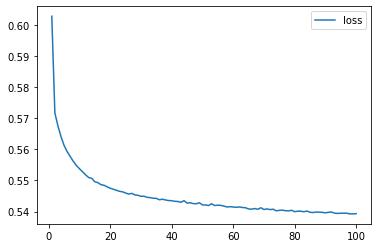

In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

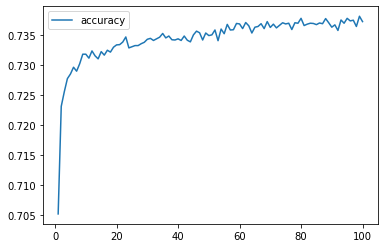

In [18]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [19]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")